### Part 2 - Data Cleanig and Exploratory Data Analysis

Within this jupyter notebook I am cleaning out the data that are coming from part 1. The goal is to get a better understanding of the differences of the posts that are published in both the sustainability and climate change subreddits. The resulting cleaned dataframe is saved and used in Part 3 and Part 4 where I am respectively creating a Logistic Regression and Random Forest model.  

In [506]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer


### **Section 1** Data Cleaning

In [507]:
df = pd.read_csv('../data/reddits.csv')

In [508]:
#checking first 5 rows
df.head(2)

,Unnamed: 0,title,selftext,subreddit,created_utc
0,0,Why does many big crop starting to have sustai...,Do they really suddenly 'care' about the envir...,sustainability,1645978811
1,1,"Austin, Tx brand doing sustainability focused ...",NaN,sustainability,1645906866


In [509]:
#dropping first column
df.drop(columns='Unnamed: 0', inplace=True)

In [510]:
#looking at the shape 
df.shape

(19817, 4)

In [511]:
#looking at the shape per subreddits
df[df['subreddit']=='sustainability'].shape, df[df['subreddit']=='climatechange'].shape

((9873, 4), (9944, 4))

In [512]:
#checking null values per subreddits
df[df['subreddit']=='sustainability'].isnull().sum(), df[df['subreddit']=='climatechange'].isnull().sum()

(title             0
 selftext       5870
 subreddit         0
 created_utc       0
 dtype: int64,
 title             0
 selftext       5948
 subreddit         0
 created_utc       0
 dtype: int64)

In [513]:
#Dropping nan columns
df= df.dropna()

In [514]:
#checking null values per subreddits
df[df['subreddit']=='sustainability'].notnull().sum(), df[df['subreddit']=='climatechange'].notnull().sum()

(title          4003
 selftext       4003
 subreddit      4003
 created_utc    4003
 dtype: int64,
 title          3996
 selftext       3996
 subreddit      3996
 created_utc    3996
 dtype: int64)

In [515]:
#general info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7999 entries, 0 to 19814
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        7999 non-null   object
 1   selftext     7999 non-null   object
 2   subreddit    7999 non-null   object
 3   created_utc  7999 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 312.5+ KB


In [516]:
#check again the head
df.head(2)

,title,selftext,subreddit,created_utc
0,Why does many big crop starting to have sustai...,Do they really suddenly 'care' about the envir...,sustainability,1645978811
4,Use new phone for 5 years or refurbished phone...,[removed],sustainability,1645893490


In [517]:
#removing website page and [removed] by using a lambda function
df['title'] = df['title'].apply(lambda x: 'website row' if 'https:' in x else x)
df['selftext'] = df['selftext'].apply(lambda x: 'website row' if 'https:' in x else x)
df['selftext'] = df['selftext'].apply(lambda x: ' ' if '[removed]' in x else x)

In [518]:
# putting together title and selftext in one column before start cleaning 
df['title_selftext'] = df['title'] + ' ' + df['selftext']

In [519]:
# let's remove html text if any
def remove_html(review):
    no_html = BeautifulSoup(review).text #removes html
    lower_case = no_html.lower()
    
    return lower_case

# applying the function above
df['title_selftext'] = df['title_selftext'].apply(remove_html)

In [520]:
# dropping first two columns
df = df.iloc[:, 2:]

In [521]:
#looking at the shape of both subreddit
df[df['subreddit']=='sustainability'].shape, df[df['subreddit']=='climatechange'].shape

((4003, 3), (3996, 3))

In [522]:
#mapping subreddit
df['subreddit'] = df['subreddit'].map({'sustainability':1, 'climatechange':0})

In [523]:
#checking
df

,subreddit,created_utc,title_selftext
0,1,1645978811,why does many big crop starting to have sustai...
4,1,1645893490,use new phone for 5 years or refurbished phone...
7,1,1645874797,"shaving hey folks, so i'm trying to ditch the ..."
8,1,1645873486,sustainable fishing and epic journey underwate...
11,1,1645838687,what is ultra fast fashion? investigating why ...
...,...,...,...
19805,0,1569646349,petition for any aussie’s out there website row
19808,0,1569634047,climate change question... about solar panel i...
19809,0,1569631762,greta thunberg the amount of hate that girl is...
19813,0,1569617554,climate change skepticism website row


### **Section 2** Exploratory Data Analysis

I want to create two different columns that are counting both the length  and the number of words of the column title_selftext. And make a comparison between the two different subreddits

In [524]:
# Creating the two functions that I need  

# Function 1 - Length
def length(sentence):
    return len(sentence)

#Function 2 - word_count
def word_count(sentence):
    sentence = sentence.split(' ')
    return len(sentence)

In [525]:
#creating lenght column
df['text_length'] = df['title_selftext'].map(length)

In [526]:
#creating word count column
df['word_count'] = df['title_selftext'].map(word_count)

**Text_Length** Now I want to take a look at the distribution of  the text_lenght for both subreddits

In [527]:
#let's create two seprate df to compare them
sustainability = df[df['subreddit']==1]
climate = df[df['subreddit']==0]

In [528]:
# sustainability: checking the range of values for lenght 
sustainability.sort_values(by='text_length', ascending=False)[['text_length']]

,text_length
4022,9984
7195,9586
7998,9344
938,8134
3195,7913
...,...
8672,10
1211,9
1259,6
1404,6


In [529]:
# sustainability: checking some stat for lenght
sustainability['text_length'].describe()

count    4003.000000
mean      325.605296
std       585.467878
min         5.000000
25%        54.000000
50%       106.000000
75%       402.500000
max      9984.000000
Name: text_length, dtype: float64

In [530]:
# climate: checking the range of values for lenght 
climate.sort_values(by='text_length', ascending=False)[['text_length']]

,text_length
18798,33599
14261,13633
12250,13583
17695,10443
10454,9304
...,...
10650,6
15540,5
12740,5
14609,5


In [531]:
# climate: checking some stat for lenght
climate['text_length'].describe()

count     3996.000000
mean       404.099349
std        907.453893
min          3.000000
25%         61.000000
50%        134.000000
75%        458.250000
max      33599.000000
Name: text_length, dtype: float64

In [532]:
# I want to remove outliers for both 
# formula Q3 + (1.5 x IQR)
sustainability = sustainability[sustainability['text_length']< (404 +(1.5*(404-54)))]
climate = climate[climate['text_length']< (459 +(1.5*(459-61)))]

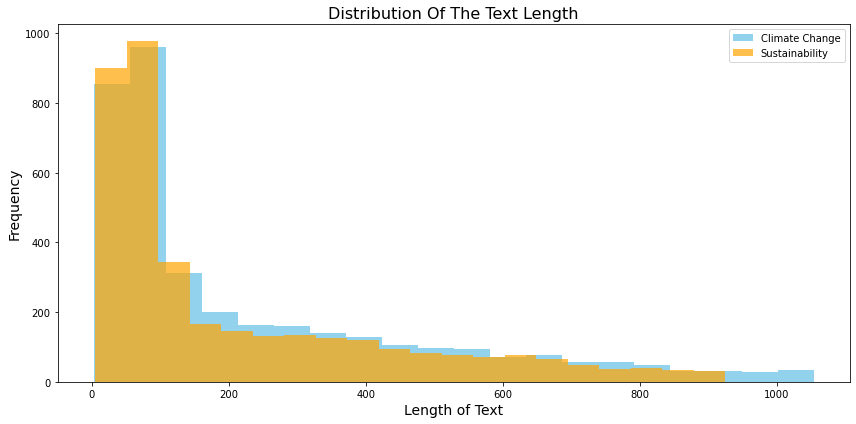

In [533]:
plt.figure(figsize=(12,6))
plt.hist(climate['text_length'], bins=20, color='skyblue', alpha=0.9, label='Climate Change')
plt.hist(sustainability['text_length'], bins=20, color='orange', alpha=0.7, label='Sustainability')
#plt.axvline(climate['text_length'].median(), color = 'orange', lw=2)
plt.xlabel('Length of Text', fontdict= {'fontsize':14})
plt.ylabel('Frequency', fontdict= {'fontsize':14})
plt.title('Distribution Of The Text Length', fontdict = {'fontsize':16})
plt.tight_layout()
plt.legend();

**Word_Count** Now I want to take a look at the distribution of  the word_count for both subreddits

In [534]:
# sustainability: checking the range of values for wordcount 
sustainability.sort_values(by='word_count', ascending=False)[['word_count']]

,word_count
8328,178
4274,177
6231,176
3349,173
5648,172
...,...
4797,2
5741,2
2104,2
924,2


In [535]:
# sustainability: checking some stat 
sustainability['word_count'].describe()

count    3702.000000
mean       35.559157
std        38.553340
min         2.000000
25%         9.000000
50%        16.000000
75%        54.000000
max       178.000000
Name: word_count, dtype: float64

In [536]:
# climate: checking the range of values for wordcount 
climate.sort_values(by='word_count', ascending=False)[['word_count']]

,word_count
12707,201
10550,199
12273,199
11283,194
13430,192
...,...
18037,3
17360,3
10834,3
17739,2


In [537]:
# climate: checking some stat 
climate['word_count'].describe()

count    3650.000000
mean       40.687123
std        43.120221
min         2.000000
25%        10.000000
50%        19.000000
75%        60.000000
max       201.000000
Name: word_count, dtype: float64

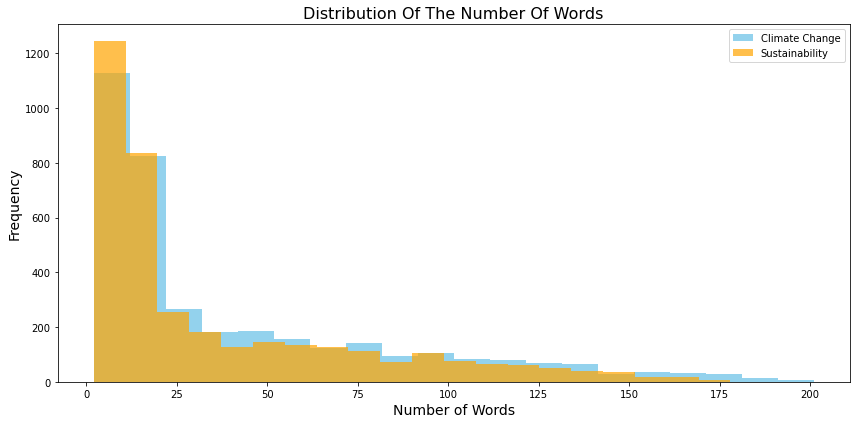

In [538]:
plt.figure(figsize=(12,6))
plt.hist(climate['word_count'], bins=20, color='skyblue', alpha=0.9, label='Climate Change')
plt.hist(sustainability['word_count'], bins=20, color='orange', alpha=0.7, label='Sustainability')
#plt.axvline(climate['text_length'].median(), color = 'orange', lw=2)
plt.xlabel('Number of Words', fontdict= {'fontsize':14})
plt.ylabel('Frequency', fontdict= {'fontsize':14})
plt.title('Distribution Of The Number Of Words', fontdict = {'fontsize':16})
plt.tight_layout()
plt.legend();

**CounterVectorizing** Here I just want to give a first look at the 15 most common words in both dataset. I will begin with ngram_range=(1, 1); and then repeat the test with  ngram_range=(2, 2)

**Step 1** First off, I need to assemble my target, predictors and train_test_split; I will also instantiate a CountVectorize only for enlarging the list of of stop_words I will be utilizing

In [539]:
#Assembling my X and y
X = df['title_selftext']
y = df['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [540]:
#Enlargin th elist of stop words
cvec = CountVectorizer(stop_words='english')
stop_words = list(cvec.get_stop_words())
lst = ['help','com' ,'have','ve' ,"does", 'know', "don", 'want', 'website', 'row', 'let', 'hey', 'guys', 
       'like', 'hey', 'place', 'http', 'www', 'bytes', 'think', "don't", "doesn't", "does", 'just', 
       'people', 'use',"i've", 'hi', 'need', 'sustainability', 'climate', 'change', 'really','sustainable']

stop_words = stop_words + lst

**CountVectorizer (1, 1)** Here I will be looking at the most common 10 single words for both subreddits

In [541]:
#instantiate and fitting countervectorizer
cvec_1 = CountVectorizer(stop_words=stop_words, ngram_range=(1, 1), 
                         max_features =2_000, min_df=7,  )
cvec_1.fit(X_train) 

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doesn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


CountVectorizer(max_features=2000, min_df=7,
                stop_words=['wherever', 'as', 'thereupon', 'is', 'somewhere',
                            'fifteen', 'hundred', 'but', 'might', 'every',
                            'side', 'no', 'nor', 'of', 'mine', 'from', 'this',
                            'ltd', 'none', 'herein', 'put', 'should', 'herself',
                            'thus', 'co', 'yet', 'also', 'he', 'bottom',
                            'sometimes', ...])

In [542]:
#transforming the corpus
transform = cvec_1.transform(X_train)

In [543]:
#turning back a dataframe
df_transform = pd.DataFrame(transform.todense(), columns= cvec_1.get_feature_names())
df_transform['subreddit'] = y_train.values

In [544]:
words_cc = df_transform.groupby('subreddit').sum().T.sort_values(0, ascending=False).iloc[:,0]
words_cc

world             467
carbon            425
global            379
years             376
earth             357
                 ... 
certifications      0
utensils            0
milk                0
cloth               0
toothbrushes        0
Name: 0, Length: 1999, dtype: int64

In [545]:
words_ss = df_transform.groupby('subreddit').sum().T.sort_values(1, ascending=False).iloc[:,1]
words_ss

make           399
plastic        352
looking        348
new            310
waste          303
              ... 
flooding         0
snow             0
hotter           0
atmospheric      0
gasses           0
Name: 1, Length: 1999, dtype: int64

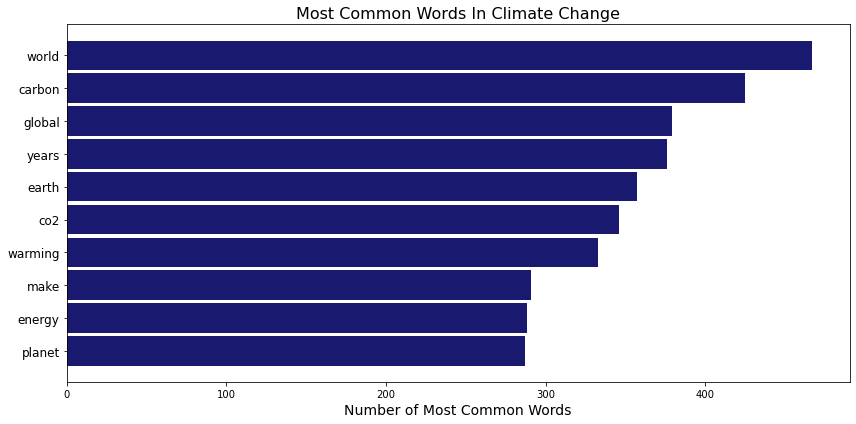

In [546]:
plt.figure(figsize=(12,6))
words_cc = words_cc.head(10).sort_values(ascending=True)
x = words_cc.index
y = words_cc
plt.barh(x,y, color ='midnightblue', height=0.90)
plt.xlabel('Number of Most Common Words', fontdict= {'fontsize':14})
plt.title('Most Common Words In Climate Change', fontdict = {'fontsize':16})
ax = plt.subplot()
ax.set_yticks(x)
ax.set_yticklabels(x, fontdict= {'fontsize':12} )
plt.tight_layout();
plt.savefig(('../images/1.commonword_cc.png'), bbox_inches="tight", dpi=100)

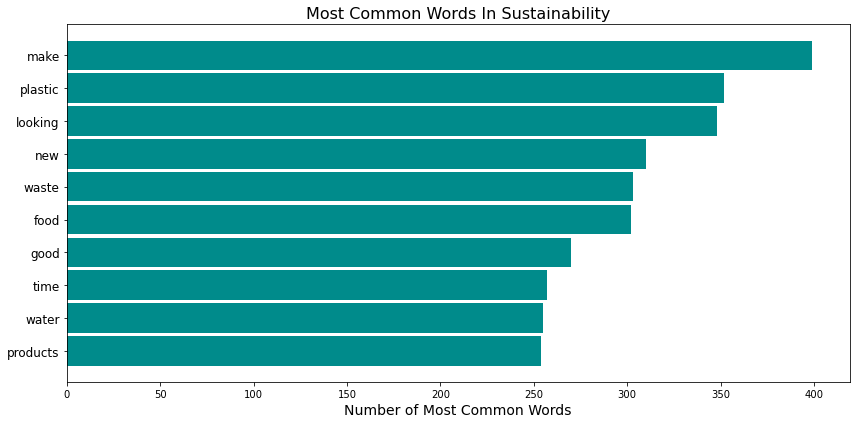

In [547]:
plt.figure(figsize=(12,6))
words_ss = words_ss.head(10).sort_values(ascending=True)
x = words_ss.index
y = words_ss
plt.barh(x,y, color ='darkcyan', height=0.90)
plt.xlabel('Number of Most Common Words', fontdict= {'fontsize':14})
plt.title('Most Common Words In Sustainability', fontdict = {'fontsize':16})
ax = plt.subplot()
ax.set_yticks(x)
ax.set_yticklabels(x, fontdict= {'fontsize':12} )
plt.tight_layout();
plt.savefig(('../images/1.commonword_ss.png'), bbox_inches="tight", dpi=100)

**CountVectorizer (2, 2)** Here I will be looking at the most common 10 bigrams  for both subreddits

In [548]:
#instantiate and fitting countervectorizer
cvec_2 = CountVectorizer(stop_words=stop_words, ngram_range=(2, 2), 
                         max_features =2_000, min_df=7,  )
cvec_2.fit(X_train) 

CountVectorizer(max_features=2000, min_df=7, ngram_range=(2, 2),
                stop_words=['wherever', 'as', 'thereupon', 'is', 'somewhere',
                            'fifteen', 'hundred', 'but', 'might', 'every',
                            'side', 'no', 'nor', 'of', 'mine', 'from', 'this',
                            'ltd', 'none', 'herein', 'put', 'should', 'herself',
                            'thus', 'co', 'yet', 'also', 'he', 'bottom',
                            'sometimes', ...])

In [549]:
#transforming the corpus
transform_2 = cvec_2.transform(X_train)

In [550]:
#turning back a dataframe
df_transform_2 = pd.DataFrame(transform_2.todense(), columns= cvec_2.get_feature_names())
df_transform_2['subreddit'] = y_train.values

In [551]:
words_cc_2 = df_transform_2.groupby('subreddit').sum().T.sort_values(0,ascending=False).iloc[:,0]
words_cc_2

global warming       217
fossil fuels          71
carbon footprint      62
co2 emissions         57
carbon emissions      53
                    ... 
fair trade             0
development goals      0
food products          0
right ask              0
looking new            0
Name: 0, Length: 457, dtype: int64

In [552]:
words_stb_2 = df_transform_2.groupby('subreddit').sum().T.sort_values(1,ascending=False).iloc[:,1]
words_stb_2

eco friendly        126
carbon footprint     54
zero waste           52
food waste           44
thanks advance       42
                   ... 
fuel companies        0
freejoy aimoo         0
feedback loops        0
end world             0
000 years             0
Name: 1, Length: 457, dtype: int64

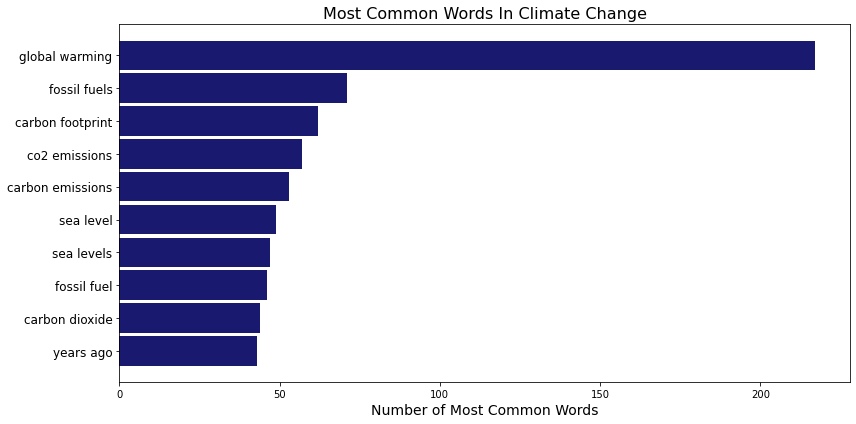

In [553]:
plt.figure(figsize=(12,6))
words_cc_2 = words_cc_2.head(10).sort_values(ascending=True)
x = words_cc_2.index
y = words_cc_2
plt.barh(x,y, color ='midnightblue', height=0.90)
plt.xlabel('Number of Most Common Words', fontdict= {'fontsize':14})
plt.title('Most Common Words In Climate Change', fontdict = {'fontsize':16})
plt.tight_layout();
ax = plt.subplot()
ax.set_yticks(x)
ax.set_yticklabels(x, fontdict= {'fontsize':12} )
plt.tight_layout();
plt.savefig(('../images/2.commonword_cc.png'), bbox_inches="tight", dpi=100)

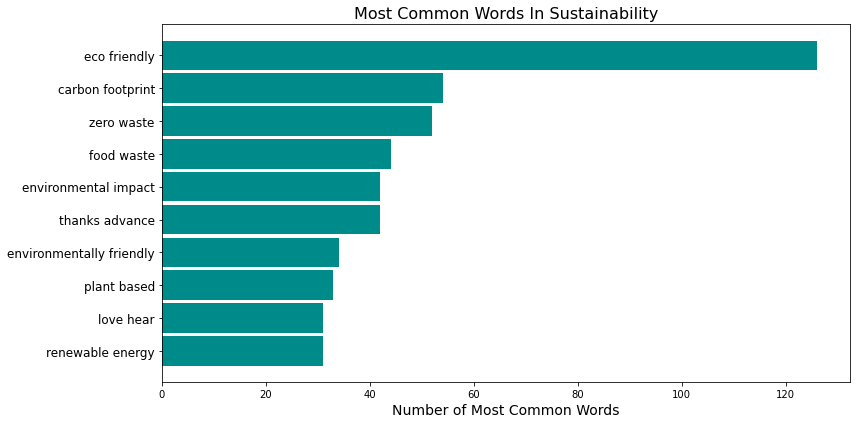

In [554]:
plt.figure(figsize=(12,6))
words_stb_2 = words_stb_2.head(10).sort_values(ascending=True)
x = words_stb_2.index
y = words_stb_2
plt.barh(x,y, color ='darkcyan', height=0.90)
plt.xlabel('Number of Most Common Words', fontdict= {'fontsize':14})
plt.title('Most Common Words In Sustainability', fontdict = {'fontsize':16})
ax = plt.subplot()
ax.set_yticks(x)
ax.set_yticklabels(x, fontdict= {'fontsize':12} )
plt.tight_layout();
plt.savefig(('../images/2.commonword_ss.png'), bbox_inches="tight", dpi=100)

**CountVectorizer (3, 3)** Here I will be looking at the most common 10 trigrams  for both subreddits

In [555]:
#instantiate and fitting countervectorizer
cvec_3 = CountVectorizer(stop_words=stop_words, ngram_range=(3, 3), 
                         max_features =2_000, min_df=7,  )
cvec_3.fit(X_train) 

CountVectorizer(max_features=2000, min_df=7, ngram_range=(3, 3),
                stop_words=['wherever', 'as', 'thereupon', 'is', 'somewhere',
                            'fifteen', 'hundred', 'but', 'might', 'every',
                            'side', 'no', 'nor', 'of', 'mine', 'from', 'this',
                            'ltd', 'none', 'herein', 'put', 'should', 'herself',
                            'thus', 'co', 'yet', 'also', 'he', 'bottom',
                            'sometimes', ...])

In [556]:
#transforming the corpus
transform_3 = cvec_3.transform(X_train)

#turning back a dataframe
df_transform_3 = pd.DataFrame(transform_3.todense(), columns= cvec_3.get_feature_names())
df_transform_3['subreddit'] = y_train.values

words_cc_3 = df_transform_3.groupby('subreddit').sum().T.sort_values(0,ascending=False).iloc[:,0]
words_cc_3

sea level rise                     29
greenhouse gas emissions           15
reduce carbon footprint            15
rising sea levels                  14
burning fossil fuels               13
green new deal                     10
fossil fuel companies               9
worst case scenario                 9
global temperature increase         8
best regard savior                  8
sea levels rise                     8
believe global warming              7
having hard time                    6
plant based diet                    6
away fossil fuels                   6
fossil fuel industry                4
make world better                   2
eco friendly products               1
having trouble finding              0
corporate social responsibility     0
build world challenge               0
shampoo conditioner bars            0
Name: 0, dtype: int64

In [557]:
words_stb_3 = df_transform_3.groupby('subreddit').sum().T.sort_values(1,ascending=False).iloc[:,1]
words_stb_3

shampoo conditioner bars           11
reduce carbon footprint            11
greenhouse gas emissions            8
build world challenge               8
eco friendly products               8
make world better                   8
corporate social responsibility     7
plant based diet                    7
having trouble finding              7
having hard time                    5
away fossil fuels                   3
fossil fuel industry                3
burning fossil fuels                2
green new deal                      1
rising sea levels                   1
sea levels rise                     1
worst case scenario                 1
believe global warming              0
global temperature increase         0
fossil fuel companies               0
sea level rise                      0
best regard savior                  0
Name: 1, dtype: int64

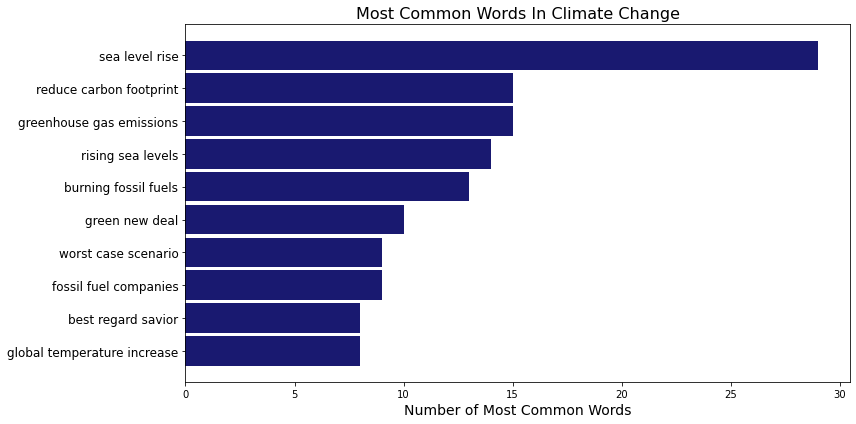

In [558]:
plt.figure(figsize=(12,6))
words_cc_3 = words_cc_3.head(10).sort_values(ascending=True)
x = words_cc_3.index
y = words_cc_3
plt.barh(x,y, color ='midnightblue', height=0.90)
plt.xlabel('Number of Most Common Words', fontdict= {'fontsize':14})
plt.title('Most Common Words In Climate Change', fontdict = {'fontsize':16})
ax = plt.subplot()
ax.set_yticks(x)
ax.set_yticklabels(x, fontdict= {'fontsize':12} )
plt.tight_layout();
plt.savefig(('../images/3.commonword_cc.png'), bbox_inches="tight", dpi=100)

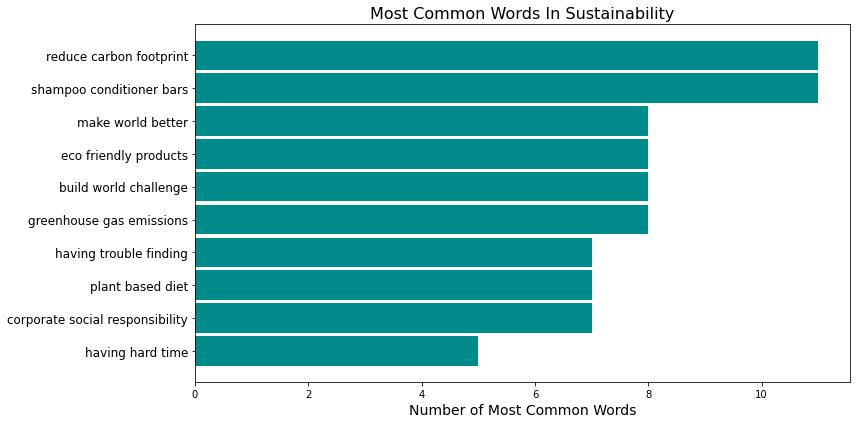

In [559]:
plt.figure(figsize=(12,6))
words_stb_3 = words_stb_3.head(10).sort_values(ascending=True)
x = words_stb_3.index
y = words_stb_3
plt.barh(x,y, color ='darkcyan', height=0.90)
plt.xlabel('Number of Most Common Words', fontdict= {'fontsize':14})
plt.title('Most Common Words In Sustainability', fontdict = {'fontsize':16})
ax = plt.subplot()
ax.set_yticks(x)
ax.set_yticklabels(x, fontdict= {'fontsize':12} )
plt.tight_layout();
plt.savefig(('../images/3.commonword_ss.png'), bbox_inches="tight", dpi=100)

### **Section 3** Sentiment Analysis and  EDA 

In this section is where I am assessing the sentiment analysis of both groups, climatechange and sustainability, and see if I can already visualize any differences in their sentiment scores. 

In [560]:
sia = SentimentIntensityAnalyzer()

In [561]:
def extract_sentiment(review):
    scores = sia.polarity_scores(review)
    return scores['compound']

In [562]:
df_new = df[['subreddit', 'title_selftext']]

In [563]:
df_new['sentiment_score'] = df_new['title_selftext'].map(extract_sentiment)

/var/folders/kz/gkm958296f79lgmty6dfw0xc0000gn/T/ipykernel_44401/2784623507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['sentiment_score'] = df_new['title_selftext'].map(extract_sentiment)


In [564]:
climatechange = df_new[df_new['subreddit'] == 0].sort_values(by='sentiment_score', ascending=False)
sustainability = df_new[df_new['subreddit'] == 1].sort_values(by='sentiment_score', ascending=False)

In [565]:
climatechange['sentiment_score'].describe()

count    3996.000000
mean        0.131979
std         0.540382
min        -0.999300
25%        -0.177900
50%         0.000000
75%         0.581625
max         0.998400
Name: sentiment_score, dtype: float64

In [566]:
sustainability['sentiment_score'].describe()

count    4003.000000
mean        0.291376
std         0.475276
min        -0.998200
25%         0.000000
50%         0.253400
75%         0.748950
max         0.999800
Name: sentiment_score, dtype: float64

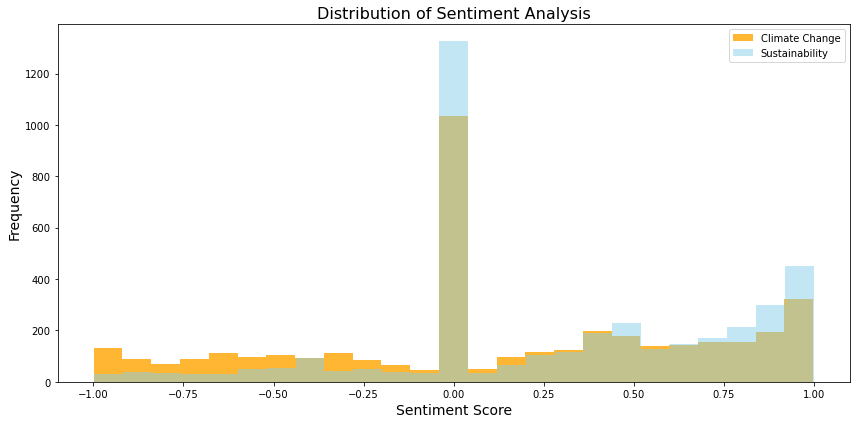

In [567]:
plt.figure(figsize=(12,6))
plt.hist(climatechange['sentiment_score'], color ='orange', label='Climate Change', alpha = 0.8, bins=25)
plt.hist(sustainability['sentiment_score'], color ='skyblue', label='Sustainability', alpha = 0.5, bins=25)
plt.xlabel('Sentiment Score', fontdict= {'fontsize':14})
plt.ylabel('Frequency', fontdict= {'fontsize':14})
plt.title('Distribution of Sentiment Analysis', fontdict = {'fontsize':16})
plt.legend()
plt.tight_layout();

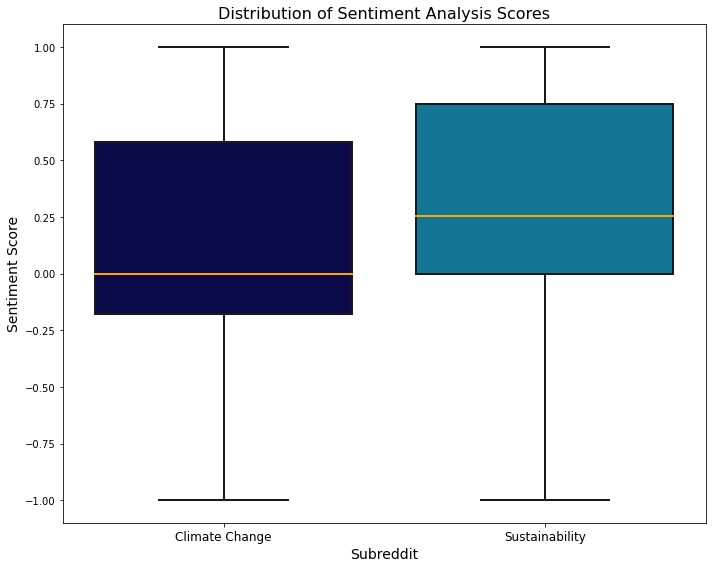

In [568]:
#Here I want to get a better picture of the distribution of Sentiment score across both subreddits
#as the boxplot show the sustainability subreddit present a slightly more positve score distribution
plt.figure(figsize=(10,8))
ax = plt.subplot()
ax = sns.boxplot(x="subreddit", y="sentiment_score",  
                 data=df_new, palette="ocean", linewidth=2, orient='v', 
                 medianprops=dict(color="orange", alpha=1))
ax.set_xlabel('Subreddit', fontdict= {'fontsize':14})
ax.set_ylabel('Sentiment Score', fontdict= {'fontsize':14})
ax.set_xticklabels(['Climate Change', 'Sustainability'], fontdict= {'fontsize':12})
ax.set_title('Distribution of Sentiment Analysis Scores', fontdict = {'fontsize':16})
plt.tight_layout();
plt.savefig(('../images/sentiment_distribution.png'), bbox_inches="tight", dpi=100)

In [569]:
#saving the new dataframe that I will be using for modeling
df_new.to_csv('../data/reddits_cleaned_sentiment.csv', index=False)